# NumPy Basics: Arrays and Vectorized Computation

> 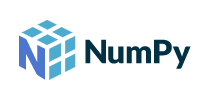



---



NumPy, short for Numerical Python, is one of the most important foundational packages for numerical computing in Python. Most computational packages providing scientific functionality use NumPy’s array objects as the lingua franca for data exchange. 

<u>Here are some of the things you’ll find in NumPy:</u>  
* ndarray, an efficient multidimensional array providing fast array-oriented arithmetic
operations and flexible broadcasting capabilities.
* Mathematical functions for fast operations on entire arrays of data without having
to write loops.
* Tools for reading/writing array data to disk and working with memory-mapped
files.
* Linear algebra, random number generation, and Fourier transform capabilities.
* A C API for connecting NumPy with libraries written in C, C++, or FORTRAN  

One of the reasons NumPy is so important for numerical computations in Python is
because it is designed for efficiency on large arrays of data. There are a number of reasons for this:
* NumPy internally stores data in a contiguous block of memory, independent of
other built-in Python objects. NumPy’s library of algorithms written in the C language
can operate on this memory without any type checking or other overhead.
NumPy arrays also use much less memory than built-in Python sequences.
* NumPy operations perform complex computations on entire arrays without the
need for Python `for` loops.

To give you an idea of the performance difference, consider a NumPy array of one
million integers, and the equivalent Python list

In [1]:
import numpy as np

In [2]:
my_arr = np.arange(1000000)

In [3]:
my_list = list(range(1000000))

Now let's multiply each sequence by 2

In [4]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 12.1 ms, sys: 6.04 ms, total: 18.2 ms
Wall time: 22.2 ms


In [5]:
%time for _ in range(10): [x *2 for x in my_list]

CPU times: user 772 ms, sys: 142 ms, total: 913 ms
Wall time: 920 ms


NumPy-based algorithms are generally 10 to 100 times faster (or more) than their pure Python counterparts and use significantly less memory.

## 4.1 The NumPy ndarray: A Multidimensional Array Object  

One of the key features of NumPy is its N-dimensional array object, or ndarray,
which is a fast, flexible container for large datasets in Python. Arrays enable you to
perform mathematical operations on whole blocks of data using similar syntax to the
equivalent operations between scalar elements.  
To give you a flavor of how NumPy enables batch computations with similar syntax
to scalar values on built-in Python objects, I first import NumPy and generate a small
array of random data

In [6]:
data = np.random.randn(2, 3)

In [7]:
data

array([[-0.03458567, -0.17852923,  1.68502181],
       [-1.25021354, -0.34515004,  1.28653887]])

In [8]:
data * 10

array([[ -0.34585668,  -1.78529235,  16.85021814],
       [-12.50213539,  -3.45150037,  12.86538869]])

In [9]:
data + data

array([[-0.06917134, -0.35705847,  3.37004363],
       [-2.50042708, -0.69030007,  2.57307774]])

In [10]:
data.shape

(2, 3)

In [11]:
data.dtype

dtype('float64')

### Creating ndarrays  

The easiest way to create an array is to use the array function. This accepts any
sequence-like object (including other arrays) and produces a new NumPy array containing
the passed data. For example, a list is a good candidate for conversion

In [12]:
data1 = [6, 7.5, 8, 0, 1]

In [13]:
arr1 = np.array(data1)

In [14]:
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Nested sequences, like a list of equal-length lists, will be converted into a multidimensional
array

In [15]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]

In [16]:
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [17]:
print('Shape of arr2 ----> ',arr2.shape)
print('arr2 no. of dimensions ----> ',arr2.ndim)
print('Data type of arr2 ----> ',arr2.dtype)

Shape of arr2 ---->  (2, 4)
arr2 no. of dimensions ---->  2
Data type of arr2 ---->  int64


In addition to np.array, there are a number of other functions for creating new
arrays. As examples, zeros and ones create arrays of 0s or 1s, respectively, with a
given length or shape. empty creates an array without initializing its values to any particular
value. To create a higher dimensional array with these methods, pass a tuple
for the shape

In [18]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [20]:
np.empty((2, 3, 6))

array([[[4.67125004e-310, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000]],

       [[0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000]]])

In [21]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

See below table for a short list of standard array creation functions. Since NumPy is
focused on numerical computing, the data type, if not specified, will in many cases be
float64

| Function      | Description |
| ------------- | ----------- |
| array | Convert input data (list, tuple, array, or other sequence type) to an ndarray either by inferring a dtype or explicitly specifying a dtype; copies the input data by default |
| asarray | Convert input to ndarray, but do not copy if the input is already an ndarray |
| arange | Like the built-in range but returns an ndarray instead of a list |
| ones, ones_like | Produce an array of all 1s with the given shape and dtype; ones_like takes another array and produces a ones array of the same shape and dtype |
| zeros, zeros_like | Like ones and ones_like but producing arrays of 0s instead |
| empty, empty_like | Create new arrays by allocating new memory, but do not populate with any values like ones and zeros |
| full, full_like | Produce an array of the given shape and dtype with all values set to the indicated “fill value” full_like takes another array and produces a filled array of the same shape and dtype |
| eye, identity | Create a square N × N identity matrix (1s on the diagonal and 0s elsewhere) |


In [23]:
type(arr2)

numpy.ndarray